In [2]:
import pandas as pd
import seaborn as sns
sns.set()

In [6]:
combo = pd.read_csv('../../../Data/Combo_4_Full.csv', dtype={'Risk_Score':'str'})

In [7]:
combo.isnull().sum()

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [8]:
combo.dtypes

Risk_Score            object
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [9]:
combo.describe()

,DI,Accepted
count,2.990940e+07,2.990940e+07
mean,inf,7.558372e-02
std,NaN,2.643309e-01
min,-1.000000e-02,0.000000e+00
25%,8.571429e-02,0.000000e+00
50%,2.000000e-01,0.000000e+00
75%,3.584000e-01,0.000000e+00
max,inf,1.000000e+00


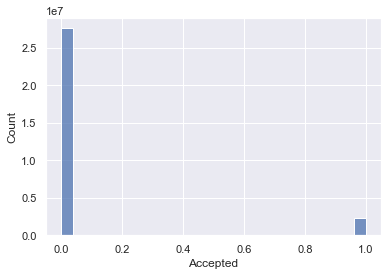

In [10]:
sns.histplot(data=combo, x='Accepted');

In [11]:
combo['Loan Type'].value_counts(dropna=False).nlargest(20)

Debt Consolidation         13606950
Other                       4856728
Credit Card Refinancing     4183182
Home Improvement            1341958
Car Financing               1313994
Major Purchase              1007934
Business Loan                885461
Medical Expenses             775643
Moving And Relocation        716407
Home Purchase                692149
Vacation                     324714
Green Loan                    58256
Wedding                       20849
Personal Loan                  6164
Student Loan                   5728
None                           1305
Freedom                         492
Motorcycle Loan                 300
debt loan                       133
debt free                       132
Name: Loan Type, dtype: int64

In [12]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [13]:
few.describe()

,DI,Accepted
count,2.991000e+04,29910.000000
mean,inf,0.075593
std,NaN,0.264351
min,-1.000000e-02,0.000000
25%,8.640000e-02,0.000000
50%,2.033000e-01,0.000000
75%,3.635750e-01,0.000000
max,inf,1.000000


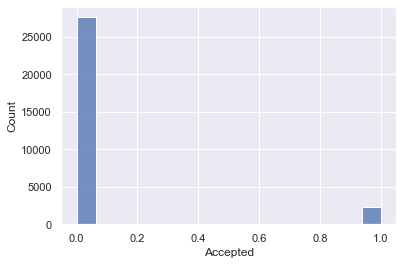

In [14]:
sns.histplot(data=few, x='Accepted');

In [15]:
few.isna().sum()

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [16]:
from pycaret.classification import *

In [17]:
experiment = setup(data = few, target = 'Accepted', categorical_features = ['Risk_Score', 'Employment Length', 'Loan Type'])

,Description,Value
0,session_id,379
1,Target,Accepted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29910, 5)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9905,0.9976,0.9117,0.9583,0.9341,0.9290,0.9295,0.5370
catboost,CatBoost Classifier,0.9898,0.9977,0.9176,0.9423,0.9296,0.9241,0.9243,1.2400
ada,Ada Boost Classifier,0.9895,0.9968,0.9014,0.9547,0.9269,0.9213,0.9219,0.4560
gbc,Gradient Boosting Classifier,0.9865,0.9936,0.8566,0.9560,0.9034,0.8962,0.8978,1.6170
lightgbm,Light Gradient Boosting Machine,0.9857,0.9963,0.8741,0.9284,0.9001,0.8924,0.8931,0.1440
et,Extra Trees Classifier,0.9835,0.9882,0.8968,0.8819,0.8889,0.8800,0.8803,1.1100
rf,Random Forest Classifier,0.9831,0.9951,0.8987,0.8759,0.8869,0.8778,0.8780,0.6480
ridge,Ridge Classifier,0.9816,0.0000,0.9935,0.8042,0.8885,0.8787,0.8847,0.0810
lda,Linear Discriminant Analysis,0.9814,0.9925,0.9961,0.8011,0.8878,0.8778,0.8841,1.1530
svm,SVM - Linear Kernel,0.9812,0.0000,0.8728,0.8738,0.8729,0.8628,0.8630,0.0780


In [19]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=379, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [20]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [21]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9904,0.9976,0.9091,0.9589,0.9333,0.9282,0.9286
1,0.9919,0.9984,0.9545,0.9363,0.9453,0.9410,0.9410
2,0.9900,0.9967,0.8896,0.9716,0.9288,0.9234,0.9245
3,0.9933,0.9983,0.9351,0.9730,0.9536,0.9500,0.9503
4,0.9890,0.9972,0.9156,0.9338,0.9246,0.9187,0.9187
5,0.9919,0.9983,0.9419,0.9481,0.9450,0.9406,0.9406
6,0.9895,0.9976,0.9091,0.9459,0.9272,0.9215,0.9217
7,0.9914,0.9984,0.9091,0.9722,0.9396,0.9350,0.9356
8,0.9885,0.9970,0.8831,0.9577,0.9189,0.9128,0.9136


In [22]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=379, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


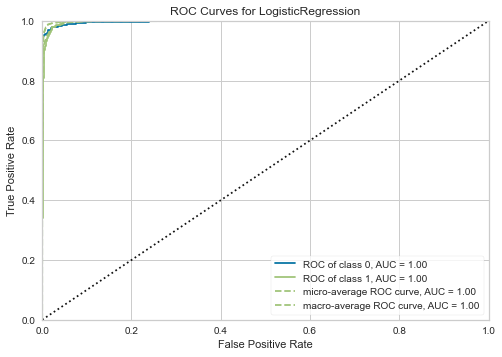

In [23]:
plot_model(lr, plot='auc')

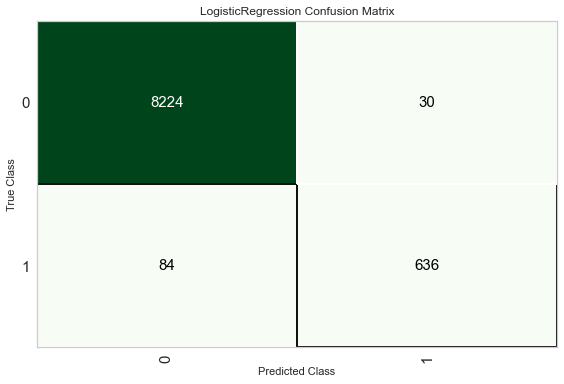

In [24]:
plot_model(lr, plot='confusion_matrix')

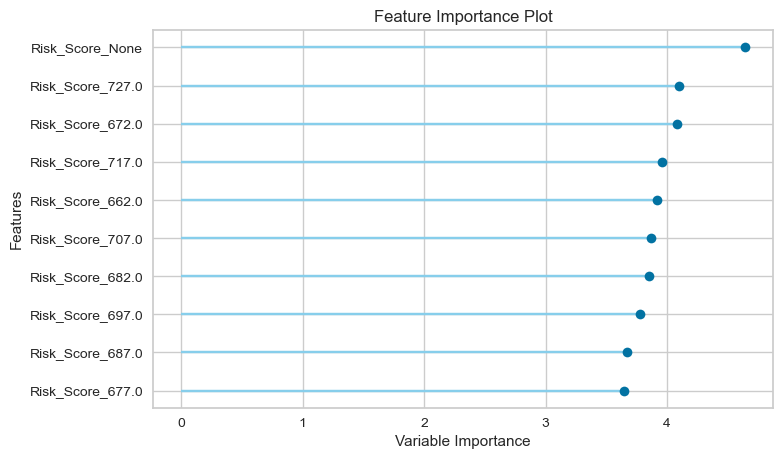

In [25]:
plot_model(lr, plot='feature')

In [26]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9895,0.9975,0.9351,0.9231,0.9290,0.9234,0.9234
1,0.9904,0.9989,0.9416,0.9295,0.9355,0.9303,0.9303
2,0.9885,0.9973,0.8961,0.9452,0.9200,0.9138,0.9142
3,0.9928,0.9986,0.9416,0.9603,0.9508,0.9470,0.9470
4,0.9885,0.9966,0.9156,0.9276,0.9216,0.9154,0.9154
5,0.9924,0.9976,0.9419,0.9542,0.9481,0.9439,0.9440
6,0.9890,0.9975,0.9091,0.9396,0.9241,0.9182,0.9183
7,0.9919,0.9984,0.9156,0.9724,0.9431,0.9388,0.9393
8,0.9852,0.9972,0.8831,0.9128,0.8977,0.8897,0.8898


In [27]:
print(cb)

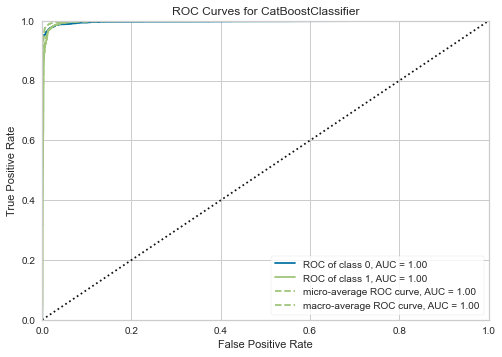

In [28]:
plot_model(cb, plot='auc')

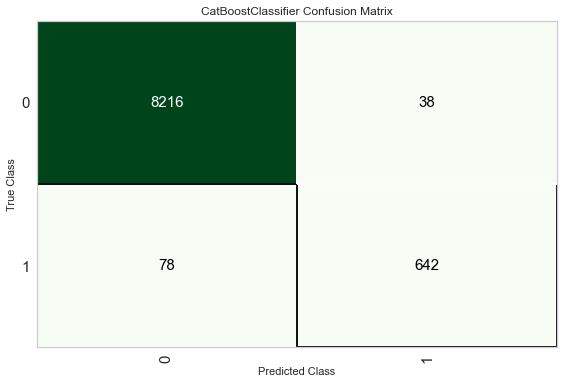

In [29]:
plot_model(cb, plot='confusion_matrix')

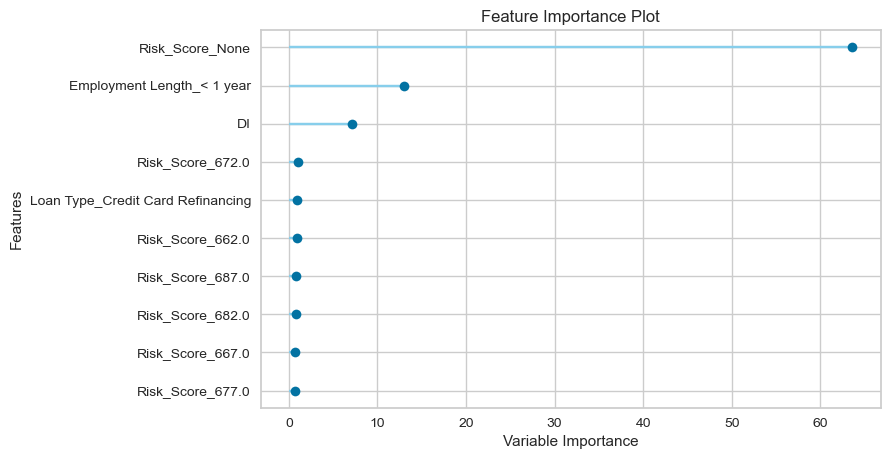

In [30]:
plot_model(cb, plot='feature')

In [ ]:
##Policy Code is internal way of assigning reject/accept/danger (0, 1, 2). 
##It's not available at time of application. 

In [ ]:
#State and Zip Code have no importance. 

In [ ]:
#Really not sure what "Application Date_is_month_start_1". It might just be the category 
#assigned to all Dates (all dates have a first month), and thereby not providing much informational value. 